In [1]:
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
# Let's explore the dataset one at a time and see the composition:
orders_dataframe = pd.read_csv('orders.csv')
orders_dataframe.head(n=10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [5]:
# Products.csv 
products_dataframe = pd.read_csv('products.csv')
products_dataframe.head(n=10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [6]:
# Department.csv
departments_dataframe = pd.read_csv('departments.csv')
departments_dataframe.head(n=10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Aisles.csv
aisles_dataframe = pd.read_csv("aisles.csv")
aisles_dataframe.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
#order_products__prior.csv
orders_products_prior_dataframe = pd.read_csv('order_products__prior.csv')
orders_products_prior_dataframe.head(n=10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [10]:
# order_products_tarin.csv
orders_products_train_dataframe = pd.read_csv('order_products__train.csv')
orders_products_train_dataframe.head(n=10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [11]:
# Below are the questions that needs to be answered:
# 1. How does the time of the day affect the orders?
# 2. How does day of week and time of day affect and order?
# 3. Typically after how many days/week a user is likely to place a new order?
# 4. What product is likely to be ordered during different times of the day?
# 5. What percentage of products are being reordered?
# 6. What are the typical cart-sizes and the number of orders by cart-size?
# 7. How many times has a product been ordered in the given dataset.
# 8. How many orders have been made from specific departments ?
# 9. What is the reorder ratio by department?
# 10.How does the add_to_cart_order variable impact the reorder of an item?
# 11.How does the day of week and hour of the day impact reorders?
# 12.Determine the probability of an item being reordered with the help of all the predictor variables described above? 

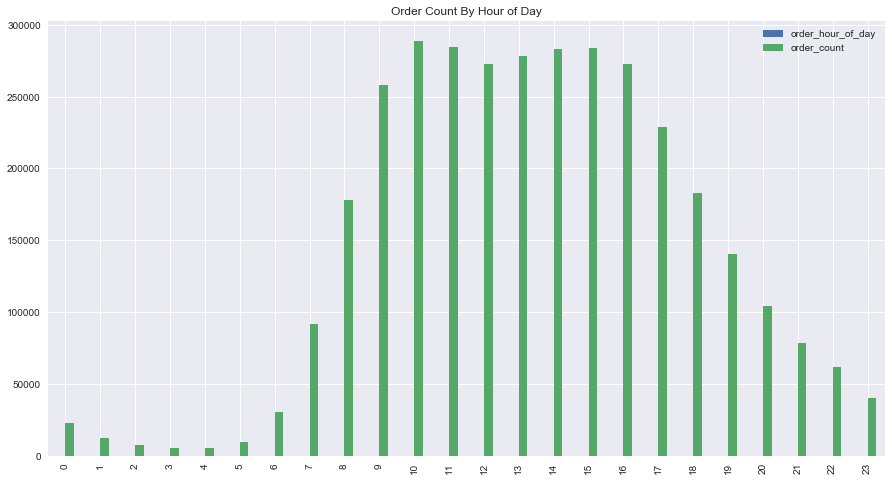

In [12]:
# To answer the first question about time of the day affecting an order, I would look at the orders.csv dataset which
# has columns like order_id,order_dow,order_hour_of_day etc.Creating a bar graph showing the count of orders at specific 
# time of day would answer the question.
order_hour_of_day_df = orders_dataframe.groupby('order_hour_of_day')['order_id'].nunique().to_frame(name='')
order_hour_of_day_df.columns = ['order_count']
order_hour_of_day_df.reset_index(inplace=True)
#order_hour_of_day_df.rename(columns={'order_hour_of_day':'hour','':'order_count'})
order_hour_of_day_df.head(n=10)
order_hour_of_day_df.plot(kind='bar',figsize=(15,8),title='Order Count By Hour of Day')

# Post Execution Notes:from the bar graph it appears that most of the orders come during daytime mostly between 9:00 AM and 4:00 PM

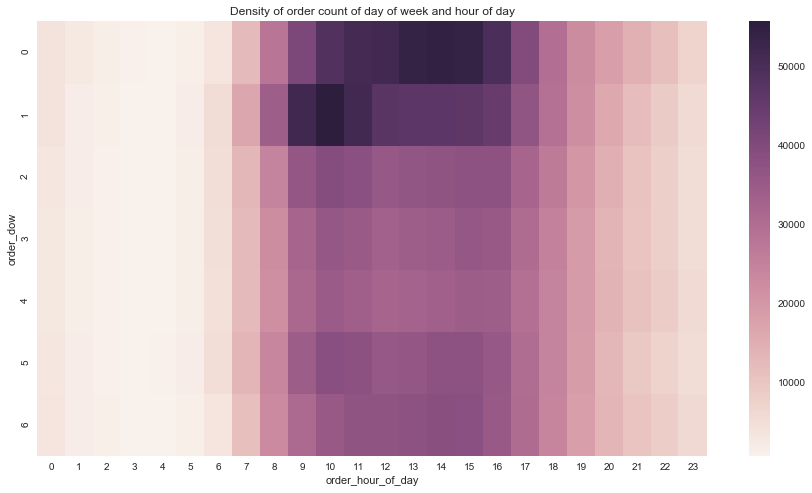

In [13]:
# 2. How does day of week and time of day affect and order?
order_by_week_day_df = orders_dataframe.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate("count").reset_index()
order_by_week_day_df = order_by_week_day_df.pivot('order_dow','order_hour_of_day','order_number')
plt.figure(figsize=(15,8))
sns.heatmap(order_by_week_day_df)
plt.title('Density of order count of day of week and hour of day')
plt.show()
# Post Execution Notes: From the graph Below we can conclude that the saturday afternoon and evenining and sunday morning are busiest in terms of the
#number of orders

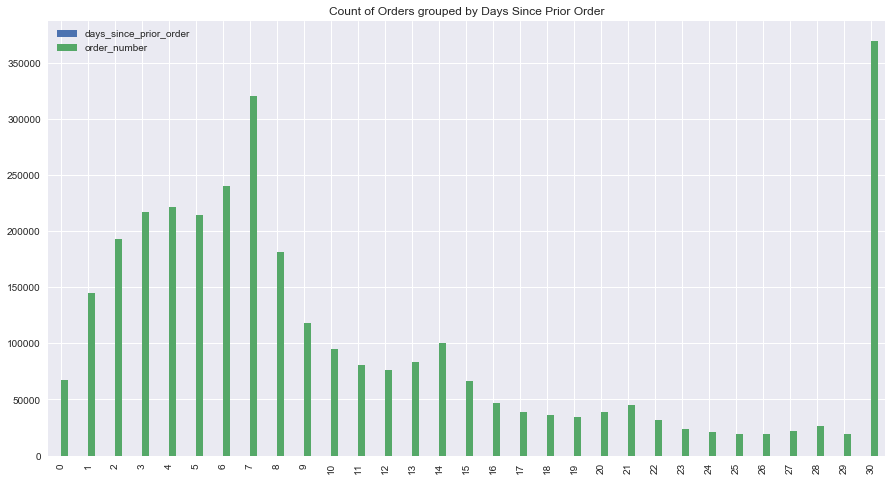

In [14]:
# To understand the distribution of number of orders by days_since_prior_order attribute
# 3. Typically after how many days/week a user is likely to place a new order?
order_count_by_days_since_prior_order = orders_dataframe.groupby(['days_since_prior_order'])['order_number'].aggregate("count").reset_index()
order_count_by_days_since_prior_order.plot(kind='bar',figsize=(15,8),title='Count of Orders grouped by Days Since Prior Order')
# This shows that lot of orders come once every month and once every week.

In [15]:
#To understand the number of products ordered in each order
orders_products_prior_dataframe.groupby(['order_id']).product_id.aggregate("count").reset_index().head()

,order_id,product_id
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [16]:
# What percentage of products have been reordered in prior dataset ?
# 5. What percentage of products are being reordered?
orders_products_prior_dataframe.reordered.sum()/len(orders_products_prior_dataframe)

0.5896974667922161

In [17]:
# What percentage of products have been reordered in train datasset
# 5. What percentage of products are being reordered?
orders_products_train_dataframe.reordered.sum()/len(orders_products_train_dataframe)

0.5985944127509629

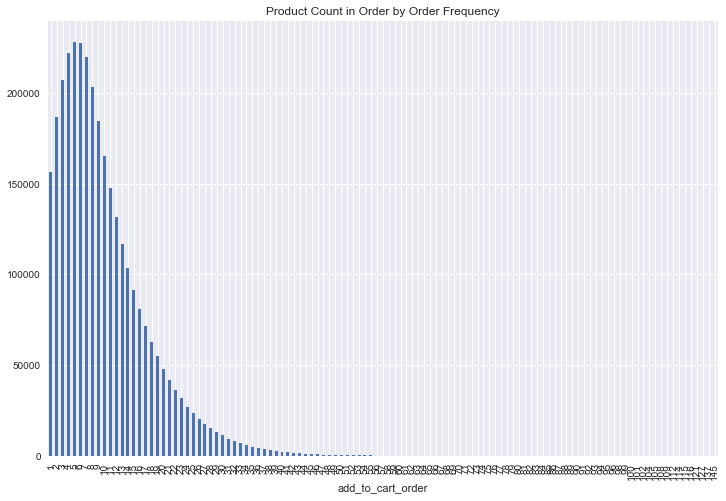

In [18]:
# To check the distribution of Number of orders by number of products in an order
# 6. What are the typical cart-sizes and the number of orders by cart-sizes?
product_count_in_order_dataframe = orders_products_prior_dataframe.groupby(['order_id']).add_to_cart_order.max().reset_index()
product_count_in_order_frequency_dataframe = product_count_in_order_dataframe.groupby(['add_to_cart_order'])['order_id'].count()
product_count_in_order_frequency_dataframe.plot(kind='bar',figsize=(12,8),title='Product Count in Order by Order Frequency')

In [19]:
# Joining the datasets for detailed analysis.
# Joining the aisle dataframe,department dataframe and product dataframe with order_product_dataframe to get the details about
# orders, the products in each order ,the respective aisle in which the product is kept and department all in one dataframe.
orders_products_prior_detailed_dataframe = orders_products_prior_dataframe.merge(products_dataframe,on='product_id',how='left')
orders_products_prior_detailed_dataframe = orders_products_prior_detailed_dataframe.merge(departments_dataframe,on='department_id',how='left')
orders_products_prior_detailed_dataframe = orders_products_prior_detailed_dataframe.merge(aisles_dataframe,on='aisle_id',how='left')
orders_products_prior_detailed_dataframe.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,pantry,baking ingredients


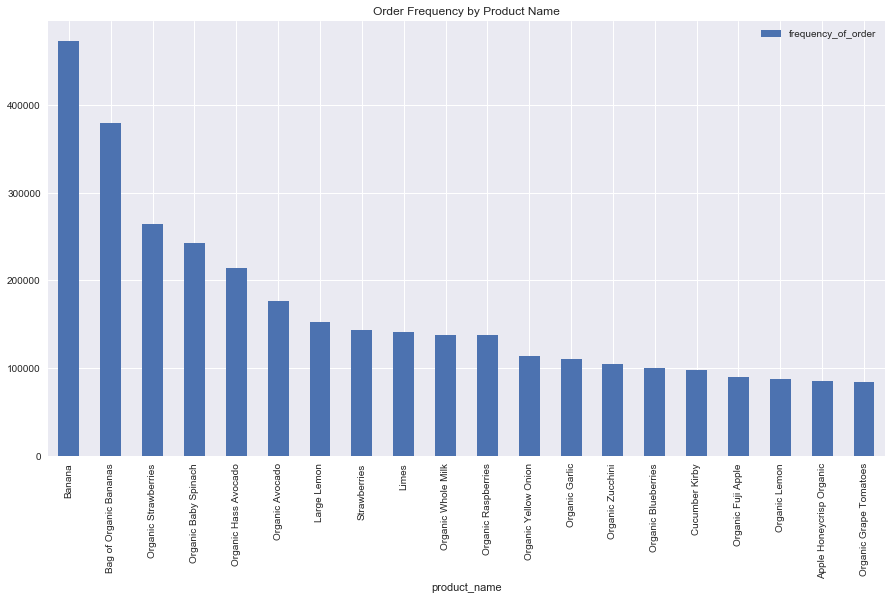

In [21]:
# 7. How many times has a product been ordered in the given dataset.
product_order_frequency_dataframe = orders_products_prior_detailed_dataframe['product_name'].value_counts().reset_index().head(n=20)
product_order_frequency_dataframe.columns = ['product_name','frequency_of_order']
product_order_frequency_dataframe.plot(x='product_name',y='frequency_of_order',kind='bar',figsize=(15,8),title='Order Frequency by Product Name')

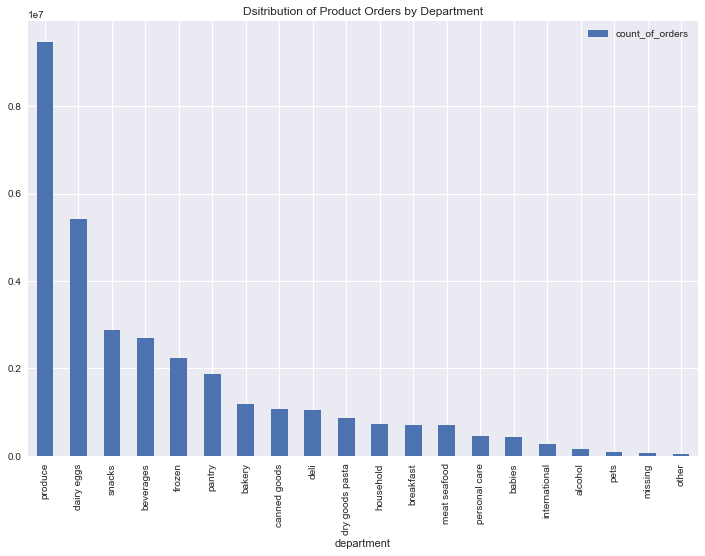

In [22]:
# 8. How many orders have been made from specific departments ?
product_order_frequency_by_department_dataframe = orders_products_prior_detailed_dataframe['department'].value_counts().reset_index().head(n=20)
product_order_frequency_by_department_dataframe.columns = ['department','count_of_orders']
product_order_frequency_by_department_dataframe.plot(kind='bar',x='department',y='count_of_orders',figsize=(12,8),title='Dsitribution of Product Orders by Department')

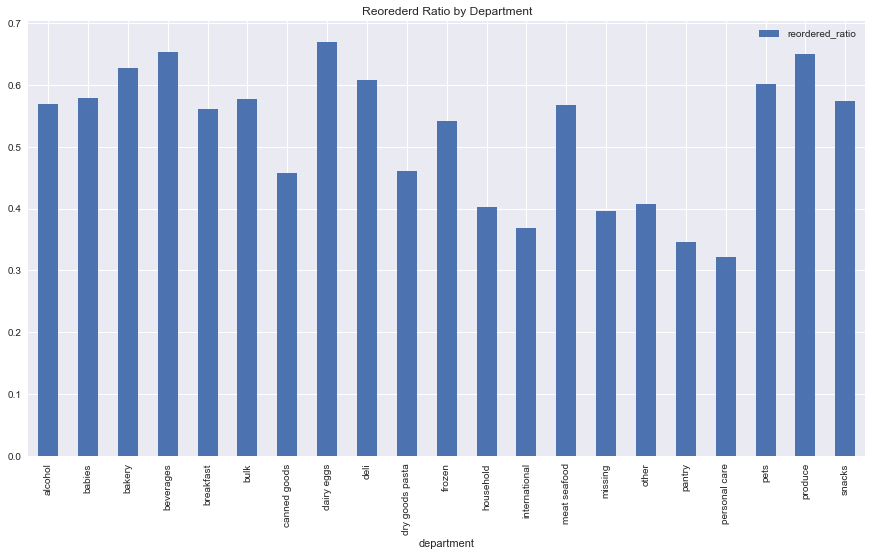

In [23]:
# 9. What is the reorder_ratio/reorder_probability by department?
reorder_by_department_dataframe = orders_products_prior_detailed_dataframe.groupby(['department'])['reordered'].aggregate("mean").reset_index()
reorder_by_department_dataframe.columns = ['department','reordered_ratio']
reorder_by_department_dataframe.plot(kind='bar',x='department',y='reordered_ratio',figsize=(15,8),title='Reorederd Ratio by Department')
# From the graph below it appears that produce,dairy eggs and beverages have highest reordered ratio

/Users/abhayranjan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abhayranjan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


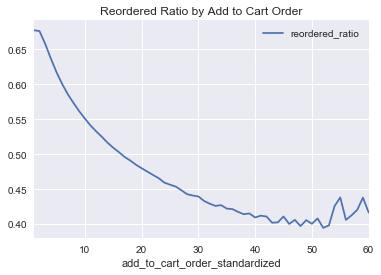

In [24]:
# 10.How does the add_to_cart_order variable impact the reorder of an item?
orders_products_prior_detailed_dataframe['add_to_cart_order_standardized'] = orders_products_prior_detailed_dataframe['add_to_cart_order'].copy()
orders_products_prior_detailed_dataframe['add_to_cart_order_standardized'].ix[orders_products_prior_detailed_dataframe['add_to_cart_order_standardized']>60]=60
add_to_cart_order_reordered_ratio_impact_dataframe = orders_products_prior_detailed_dataframe.groupby(['add_to_cart_order_standardized'])['reordered'].aggregate("mean").reset_index()
add_to_cart_order_reordered_ratio_impact_dataframe.columns=['add_to_cart_order_standardized','reordered_ratio']
add_to_cart_order_reordered_ratio_impact_dataframe.plot(kind='line',x='add_to_cart_order_standardized',y='reordered_ratio',title='Reordered Ratio by Add to Cart Order')
# Post Execution Note:This shows that that products which are high in the add_to_cart_order also have a high reorder ratio.

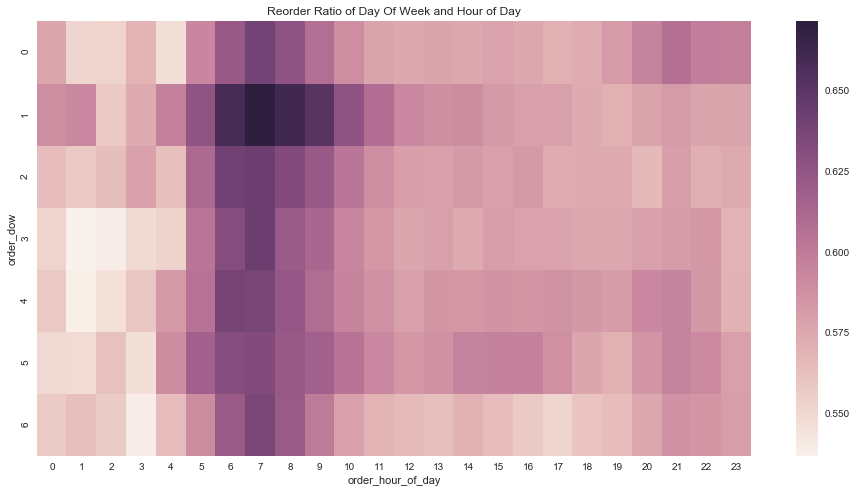

In [26]:
# To understand the reordering pattern by day of week and hour of the day.
import seaborn as sns
from matplotlib import pyplot as plt
orders_products_prior_combined_dataframe = orders_dataframe.merge(orders_products_prior_dataframe,on='order_id',how='inner')
reordering_pattern_dataframe = orders_products_prior_combined_dataframe.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate("mean").reset_index()
reordering_pattern_dataframe = reordering_pattern_dataframe.pivot('order_dow','order_hour_of_day','reordered')
plt.figure(figsize=(16,8))
sns.heatmap(reordering_pattern_dataframe)
plt.title("Reorder Ratio of Day Of Week and Hour of Day")
plt.show()
# Post Execution Note: This shows that reorder ratio is particularly high on sunday early mornings.

In [27]:
# Final Dataset Preparation for Model Generation
final_order_dataframe = orders_dataframe.merge(orders_products_prior_dataframe,on='order_id',how='left')
final_order_dataframe = final_order_dataframe.merge(products_dataframe,on='product_id',how='left')
final_order_dataframe = final_order_dataframe.merge(departments_dataframe,on='department_id',how='left')
final_order_dataframe = final_order_dataframe.merge(aisles_dataframe,on='aisle_id',how='left')
final_order_dataframe = final_order_dataframe[final_order_dataframe.days_since_prior_order.notnull()]

In [28]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

/Users/abhayranjan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
# Data about all the orders apart from which
# products they contain
orders = pd.read_csv('orders.csv')

# The set of prior orders we want to use to
# predict the next order a user is going to place
orders_prior = orders[orders['eval_set'] == 'prior']

# Add the product information to the prior orders
products_prior = pd.read_csv('order_products__prior.csv')
products_prior = products_prior.merge(orders_prior,how = 'left',on = 'order_id')
products_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0


In [30]:
# We calculate the overall percentage of reorders for
# each product
product_prior_dist = pd.DataFrame(products_prior.groupby('product_id')['reordered'].sum()/products_prior.groupby('product_id').size())

# Rename the column
product_prior_dist.columns = ['prior_prob']

In [31]:
# For all users, for every product they've ordered,
# count how many times they've ordered it
products_ordered = (products_prior.groupby(['user_id', 'product_id']).size().reset_index().rename(columns={0:'times_ordered'}))

# For all users, count their number of orders
number_of_orders = pd.DataFrame(products_prior.groupby(['user_id'])['order_id'].nunique()).reset_index().rename(columns={'order_id':'total_user_orders'})

# Merging the DataFrame
product_dist_per_user = products_ordered.merge(number_of_orders, how = 'left', on = 'user_id')

# To calculate the product ordering probability per user
product_dist_per_user['product_prob_user'] = (product_dist_per_user['times_ordered']/product_dist_per_user['total_user_orders'])

# Add in the overall ordering probabilities
product_prob = product_dist_per_user.merge(product_prior_dist, how = 'left', left_on = 'product_id', right_index = True)

# Calculate reordering score p
product_prob['p'] = (product_prob['product_prob_user']*product_prob['prior_prob']/(1-product_prob['product_prob_user']))

product_prob.head(3)

,user_id,product_id,times_ordered,total_user_orders,product_prob_user,prior_prob,p
0,1,196,10,10,1.0,0.776480,inf
1,1,10258,9,10,0.9,0.713772,6.423947
2,1,10326,1,10,0.1,0.652009,0.072445


In [32]:
# To get the orders in the training set
orders_train = orders[orders['eval_set'] == 'train']

# Import the data in a dataframe from order_products__train.csv and add to orders_train
products_train = pd.read_csv('order_products__train.csv')
products_train = products_train.merge(orders_train,how = 'left',on = 'order_id')

# Filter the DataFrame for reordered products
products_train = products_train[products_train['reordered']==1]
products_train.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [39]:
# Create a DataFrame containing a column which has list of products for a particular order
reordered_train = products_train[['order_id', 'product_id']].groupby('order_id')['product_id'].apply(list)

# Put the user_id of the orders back in; we'll need itto get the user-dependent ordering probabilities
reordered_train = pd.DataFrame(reordered_train).merge(orders_train[['order_id','user_id']], how = 'left', right_on = 'order_id', left_index = True)
reordered_train.head(3)

,product_id,order_id,user_id
1868044,"[49302, 11109, 43633, 22035]",1,112108
1322255,"[19660, 43086, 46620, 34497, 48679, 46979]",36,79431
709772,[21616],38,42756


In [41]:
# Predict based on the reordering score which products a user is going to want in their next order using a threshold 0.5
pred = product_prob[product_prob['p'] > 0.5]

# Convert to list format
pred = pred.groupby('user_id')['product_id'].apply(list)

# Combine actual and prediction dataframe
reordered_pred_train = reordered_train.merge(pd.DataFrame(pred), how='left', left_on='user_id', right_index = True)

# If we predict that none of the products will be reordered, we make this explicit as 'None'
reordered_pred_train.fillna('None', inplace=True)
#reordered_pred_train.rename(columns = {'product_id_x':'actual_product_list','product_id_y':'predicted_product_list'},inplace=True)
reordered_pred_train.head(3)

,actual_product_list,order_id,user_id,predicted_product_list
1868044,"[49302, 11109, 43633, 22035]",1,112108,"[5707, 11109, 14947, 22035, 30881, 43633, 4435..."
1322255,"[19660, 43086, 46620, 34497, 48679, 46979]",36,79431,"[19660, 20119]"
709772,[21616],38,42756,"[1940, 8012]"


In [42]:
# Function to calculate the F1 score

def precision(truth, pred):
    true_positives = set(truth).intersection(pred)
    false_positives = set(pred) - set(truth)
    num_true = len(true_positives)
    num_false = len(false_positives)
    if (num_true + num_false == 0):
        return 1
    else:
        return num_true/(num_true+num_false)
    
def recall(truth, pred):
    true_positives = set(truth).intersection(pred)
    false_negatives = set(truth) - set(pred)
    num_true = len(true_positives)
    num_false = len(false_negatives)
    if (num_true + num_false == 0):
        return 1
    else:
        return num_true/(num_true+num_false)
    
def f1_score(truth, pred):
    p = precision(truth, pred)
    r = recall(truth, pred)
    if( p+r == 0 ):
        return 0
    else:
        return 2*p*r/(p+r)

In [45]:
# Calculate the F1 scores of our predictions
reordered_pred_train['f1'] = reordered_pred_train.apply(lambda row: f1_score(row['product_id_x'], row['product_id_y']), axis=1)
# Average f1 score of our prediction
reordered_pred_train['f1'].mean()

0.35194583444340666

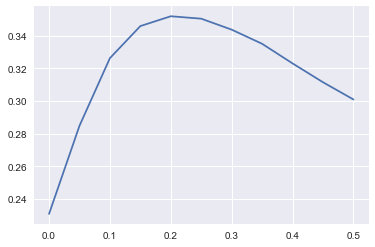

In [48]:
# Optimize the threshold value
import numpy as np
thresholds = [0.0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
scores = []
for t in thresholds:
    pred = (
        product_prob[product_prob['p'] > t]
        .groupby('user_id')['product_id']
        .apply(list)
    )
    reordered_pred_train = reordered_train.merge(
        pd.DataFrame(pred), 
        how='left', 
        left_on='user_id', 
        right_index = True
    )
    reordered_pred_train.fillna('None', inplace=True)
    reordered_pred_train['f1'] = reordered_pred_train.apply(
        lambda row: f1_score(
            row['product_id_x'], 
            row['product_id_y']
        ), 
        axis=1)
    scores.append(reordered_pred_train['f1'].mean())
    
plt.plot(thresholds, scores)
plt.show()